# Predicción de precio de móviles


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Lectura del fichero


In [2]:
mobile_data = pd.read_csv('datasets/moviles.csv')
mobile_data.shape

(2000, 21)

1. Preprocesado de los datos


In [3]:
mobile_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

- Comprobación de valores nulos


In [4]:
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


- Comprobación de balanceo


In [6]:
X = mobile_data.drop('price_range', axis=1)
y = mobile_data['price_range']

y.value_counts(normalize=True) * 100

price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64

- Estandarizado de datos


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mobile_data.drop('price_range', axis=1))

2. Selección de modelos


In [8]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Decision_Tree': DecisionTreeClassifier(max_depth=3),
    'Random_Forest': RandomForestClassifier(max_depth=7),
    'SVC': SVC(probability=True),
    'Naive_Bayes': GaussianNB()
}

3. Entrenamiento y validación de modelos


In [9]:
X = scaled_data
y = mobile_data['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scores = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    scores[name] = cross_val_score(model, X_train, y_train, scoring='accuracy')
    print(f'{name}: Average Accuracy={np.mean(scores[name]):.4f}')

KNN: Average Accuracy=0.5325
Decision_Tree: Average Accuracy=0.7706
Random_Forest: Average Accuracy=0.8438
SVC: Average Accuracy=0.8644
Naive_Bayes: Average Accuracy=0.7969


4. Evaluación y comparación de modelos


In [10]:
def report_print(name, model):

    scores[name] = cross_val_score(model, X_train, y_train, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = cross_val_predict(model, X, y, cv=5)
    print(f'----- {name} -----')
    print(f'Average Accuracy: {np.mean(scores[name]):.4f}')
    print(
        f'AUC (Cross-validated): {np.mean(cross_val_score(model, X, y, scoring="roc_auc_ovr")):.4f}')

    if name == 'KNN':
        print(f'Number of neighbors: {model.n_neighbors}')

    if name == 'Decision_Tree':
        print(f'Maximum depth: {model.get_depth()}')
        print(f'Number of nodes: {model.tree_.node_count}')
        print(f'Number of leaf nodes: {model.get_n_leaves()}')

    if name == 'Random_Forest':
        print(f'Number of trees: {model.n_estimators}')
        print(f'Maximum depth: {model.max_depth}')
    print(classification_report(y, y_pred))


for name, model in models.items():
    report_print(name, model)

----- KNN -----
Average Accuracy: 0.5325
AUC (Cross-validated): 0.7902
Number of neighbors: 10
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       500
           1       0.41      0.44      0.43       500
           2       0.43      0.43      0.43       500
           3       0.75      0.59      0.66       500

    accuracy                           0.55      2000
   macro avg       0.56      0.55      0.55      2000
weighted avg       0.56      0.55      0.55      2000

----- Decision_Tree -----
Average Accuracy: 0.7706
AUC (Cross-validated): 0.9187
Maximum depth: 3
Number of nodes: 15
Number of leaf nodes: 8
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       500
           1       0.65      0.80      0.72       500
           2       0.67      0.60      0.63       500
           3       0.83      0.84      0.83       500

    accuracy                           0.76      2000
  

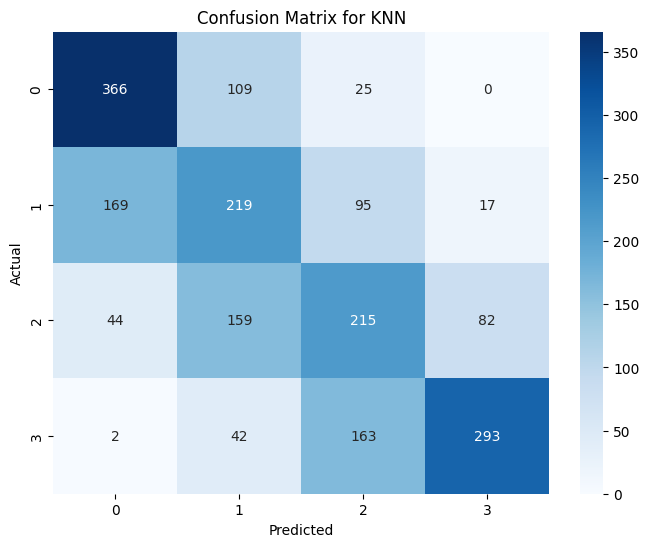

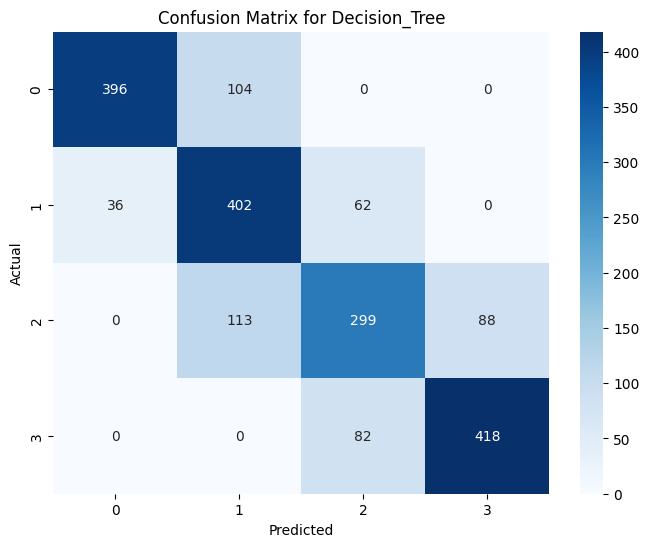

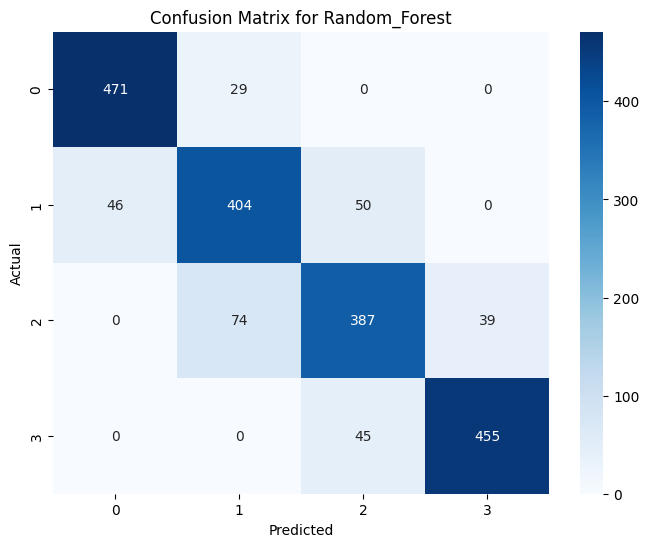

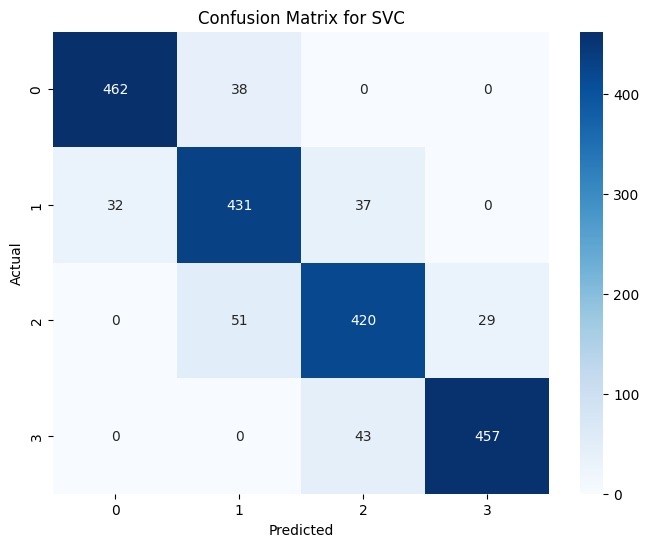

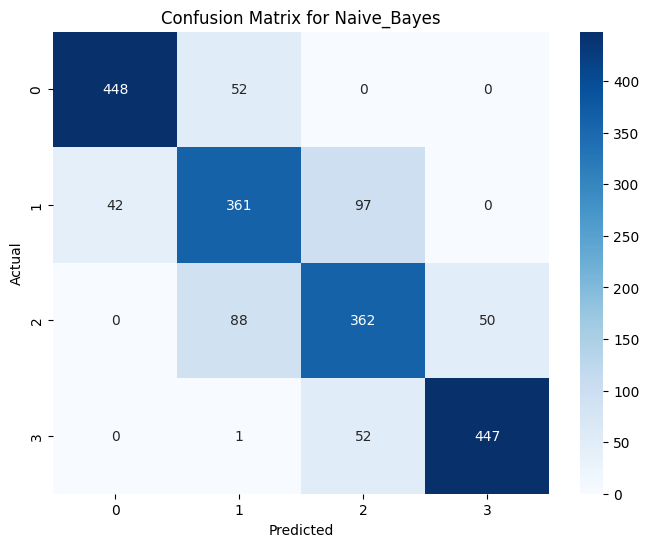

In [11]:
def confusion_matrix_plot(name, model):
    y_pred = cross_val_predict(model, X, y, cv=5)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


for name, model in models.items():
    confusion_matrix_plot(name, model)

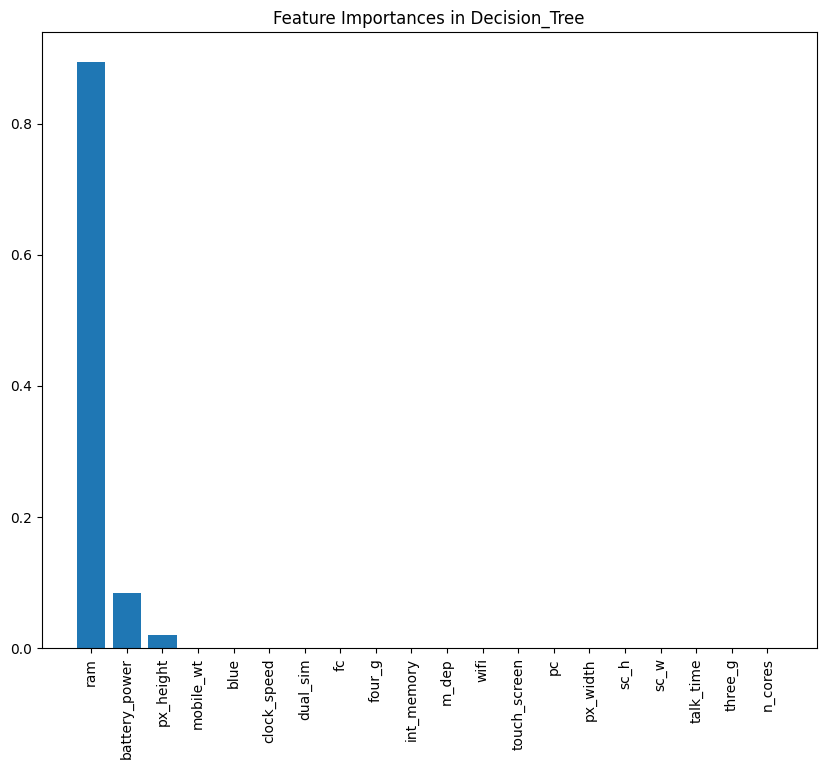

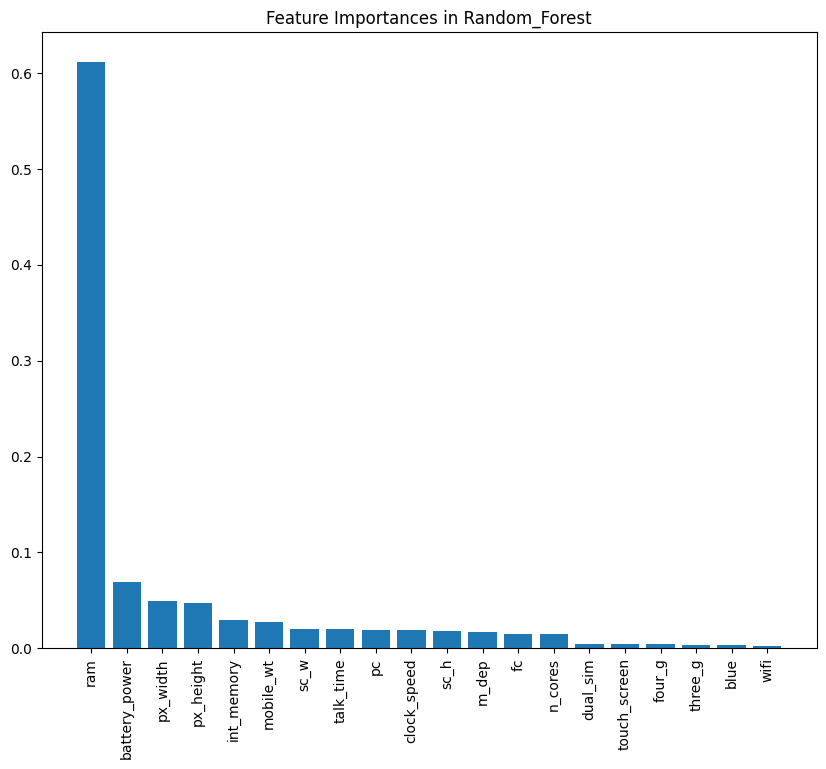

In [12]:
def importances(model_name):
    plt.figure(figsize=(10, 8))
    importance = models[model_name].feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.title('Feature Importances in ' + model_name)
    plt.bar(range(X_train.shape[1]), importance[indices])
    plt.xticks(range(X_train.shape[1]),
               mobile_data.columns[indices], rotation=90)
    plt.show()


if 'Decision_Tree' in models:
    importances('Decision_Tree')

if 'Random_Forest' in models:
    importances('Random_Forest')

Curva ROC y AUC


----- KNN -----


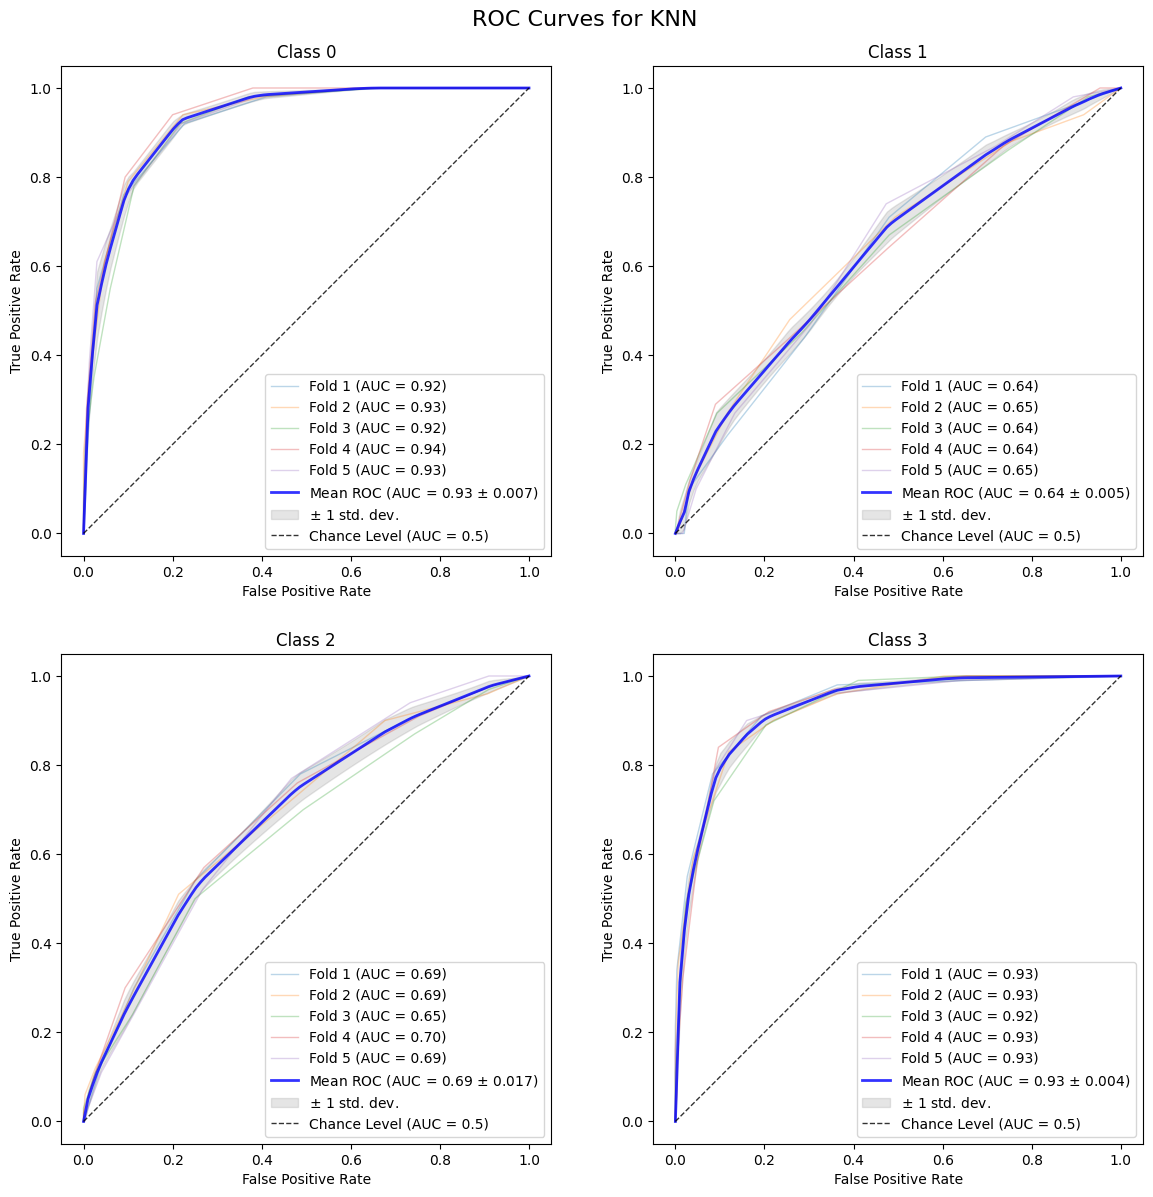

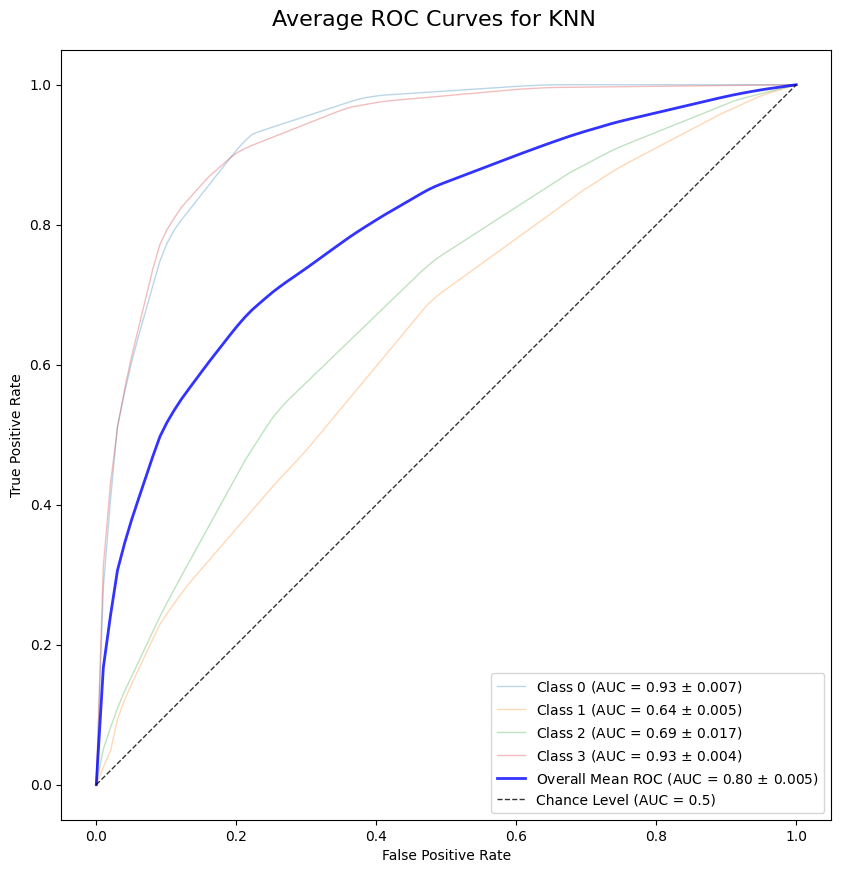

----- Decision_Tree -----


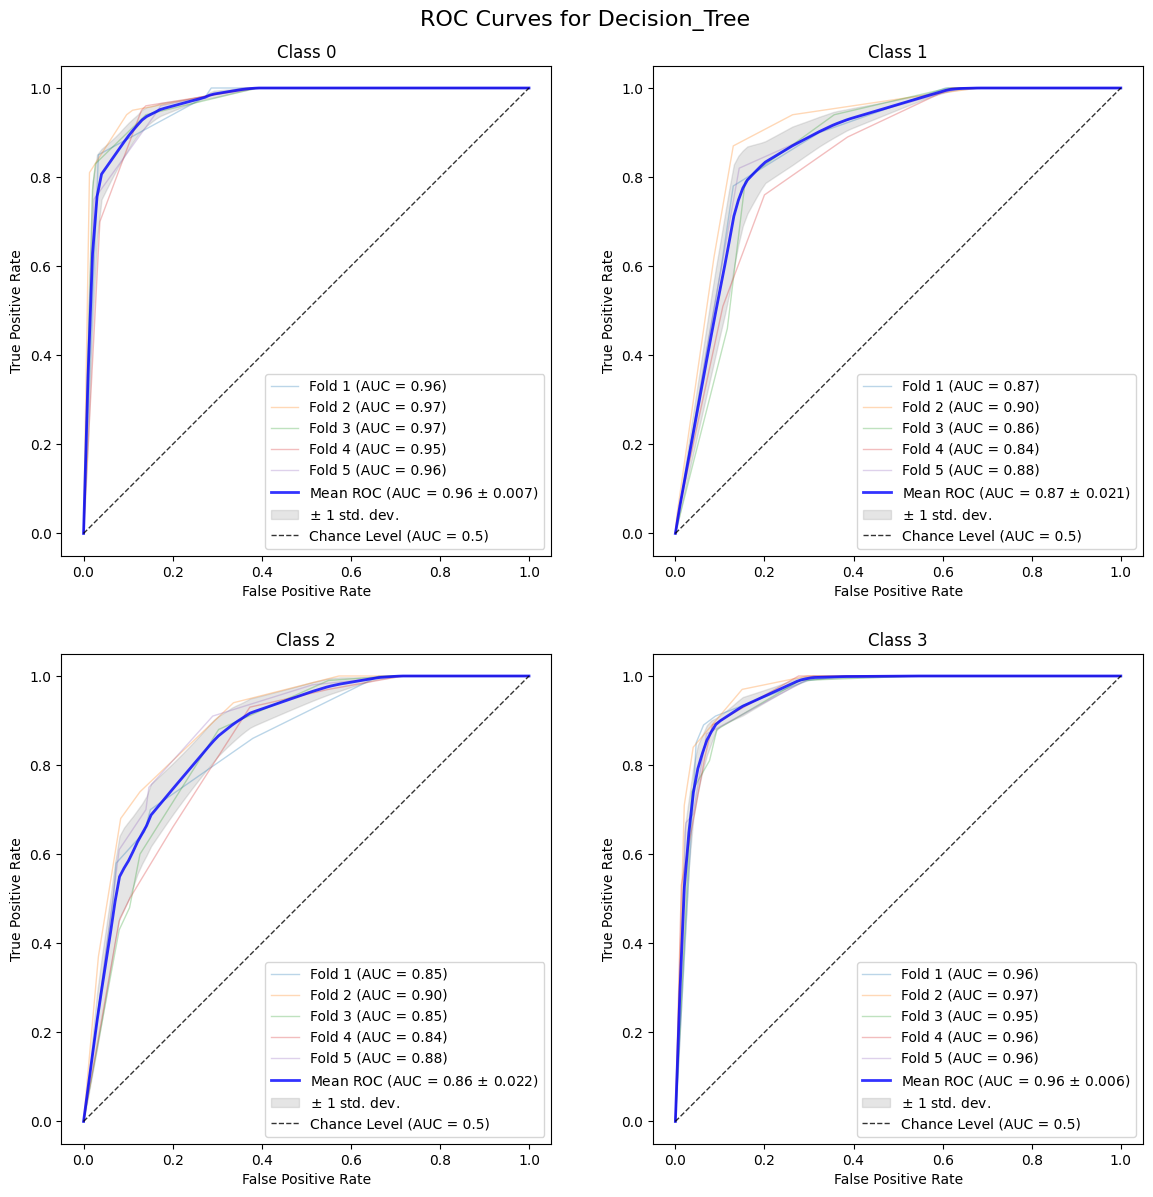

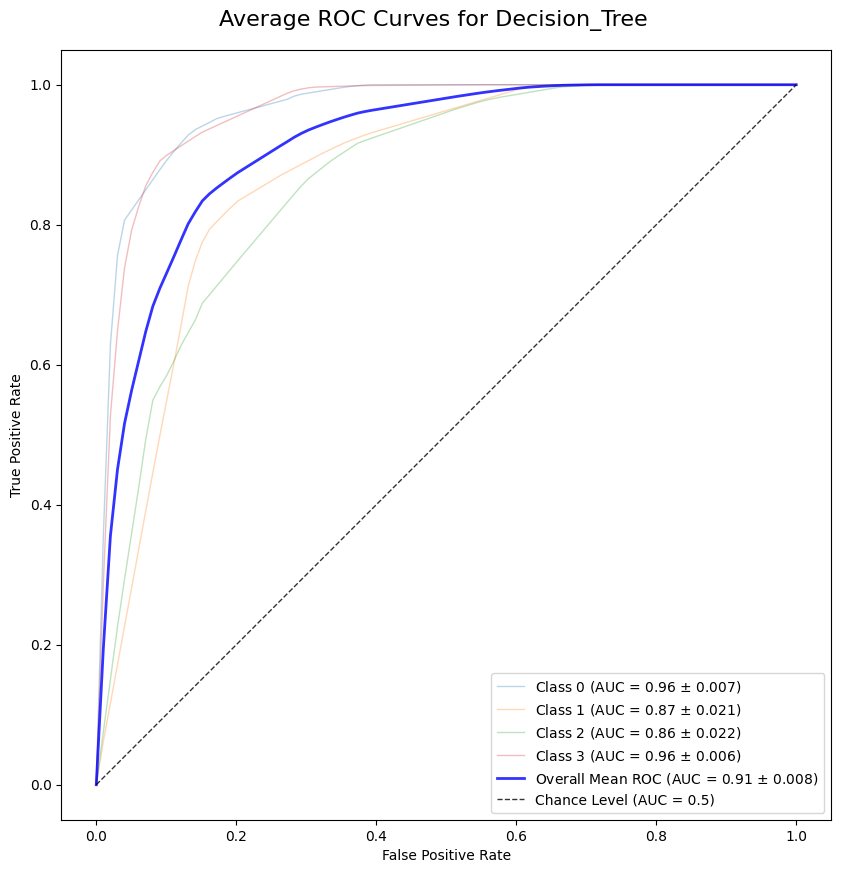

----- Random_Forest -----


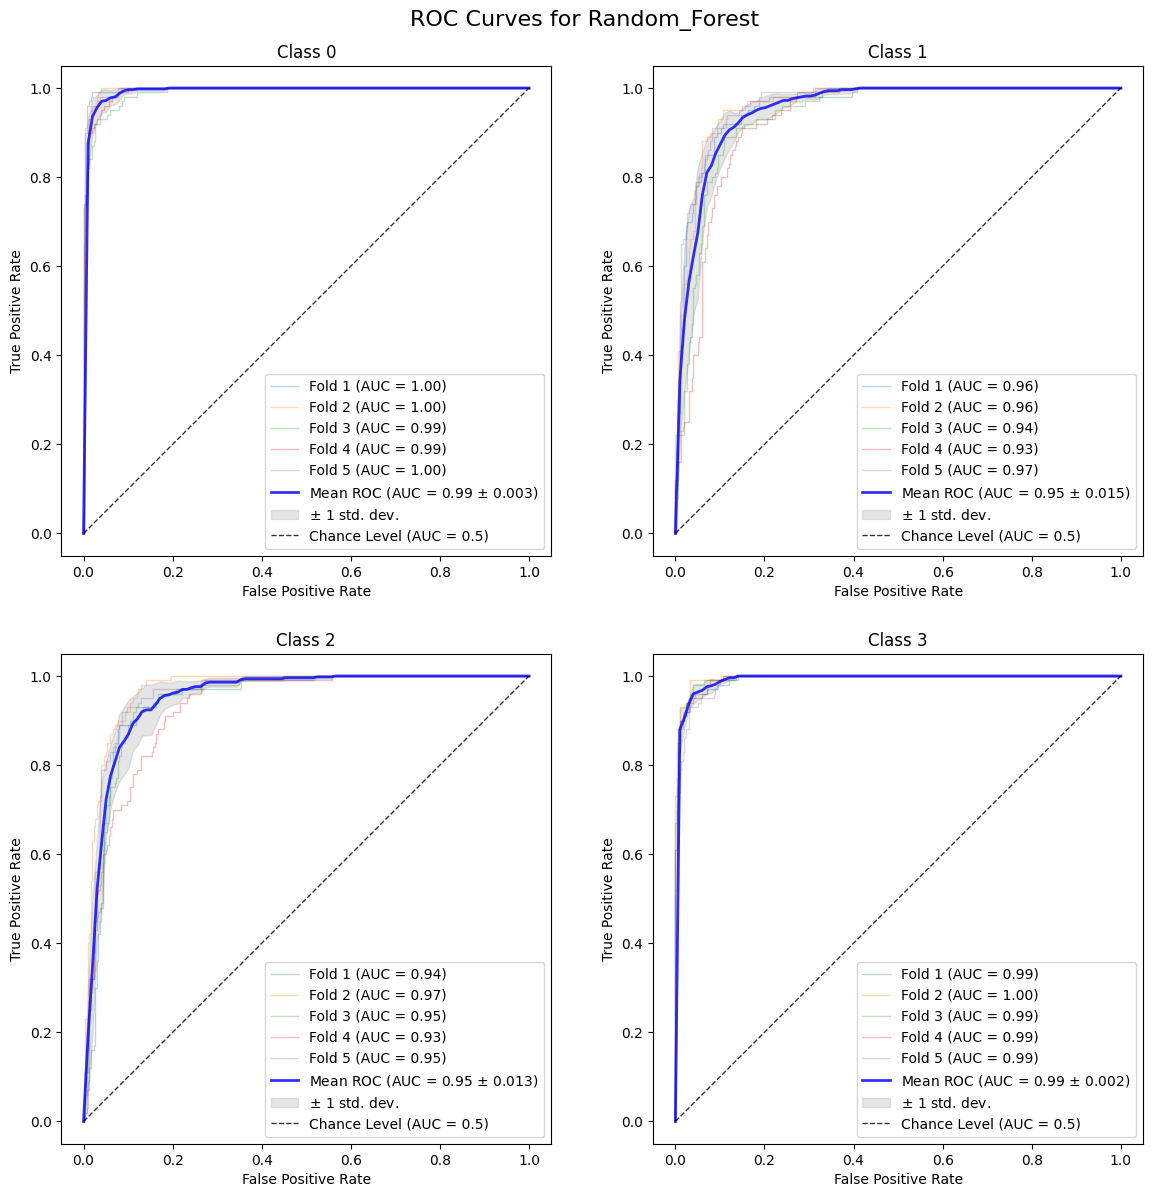

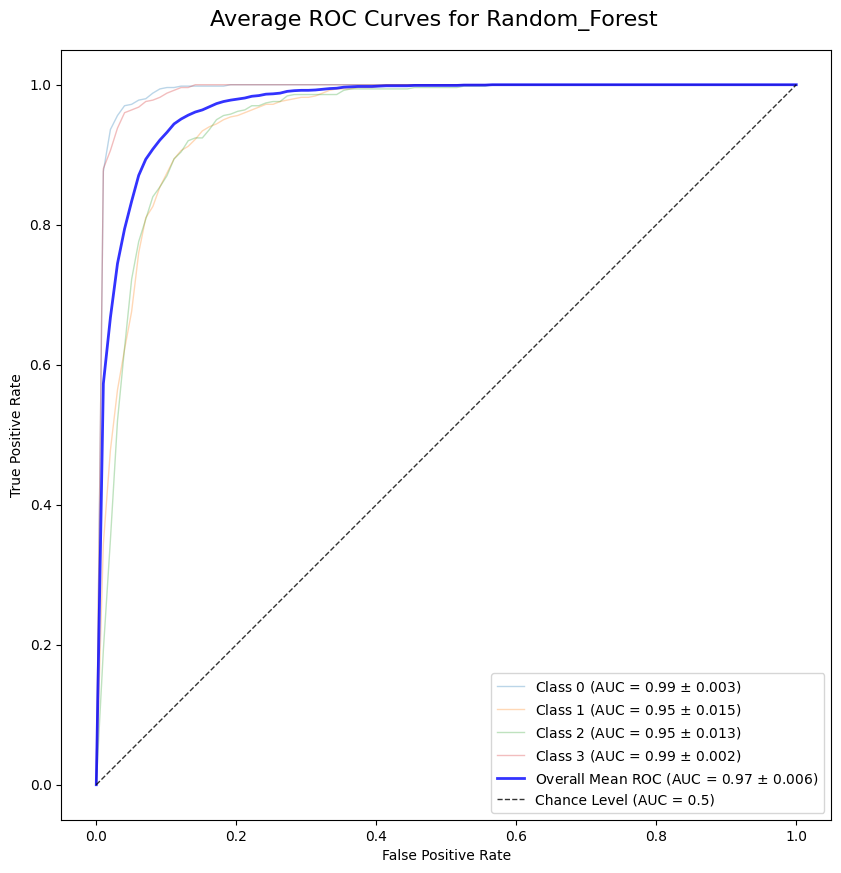

----- SVC -----


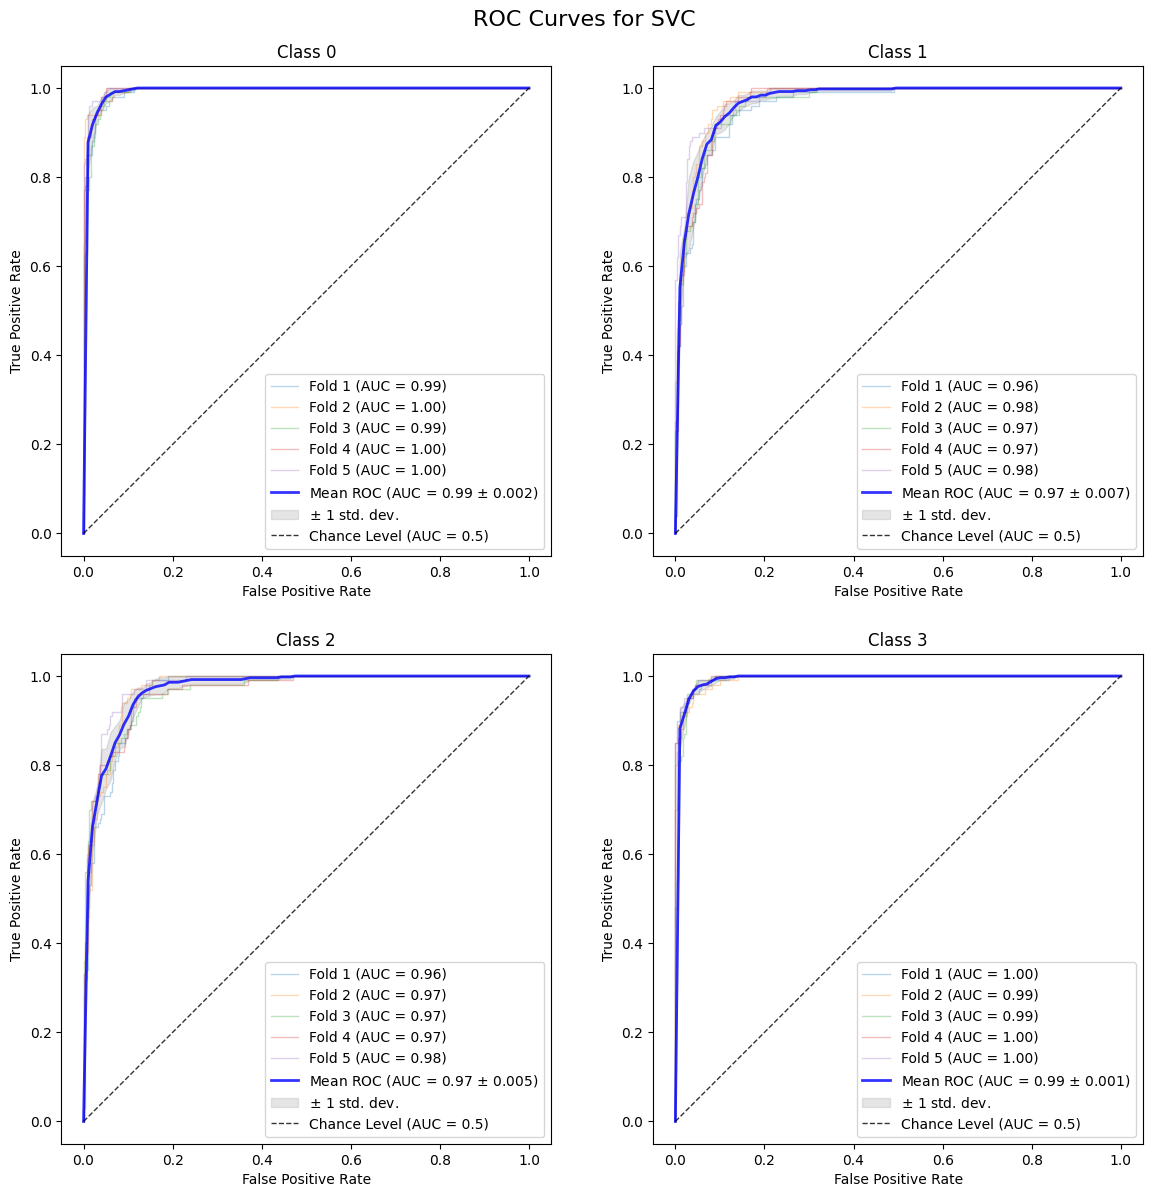

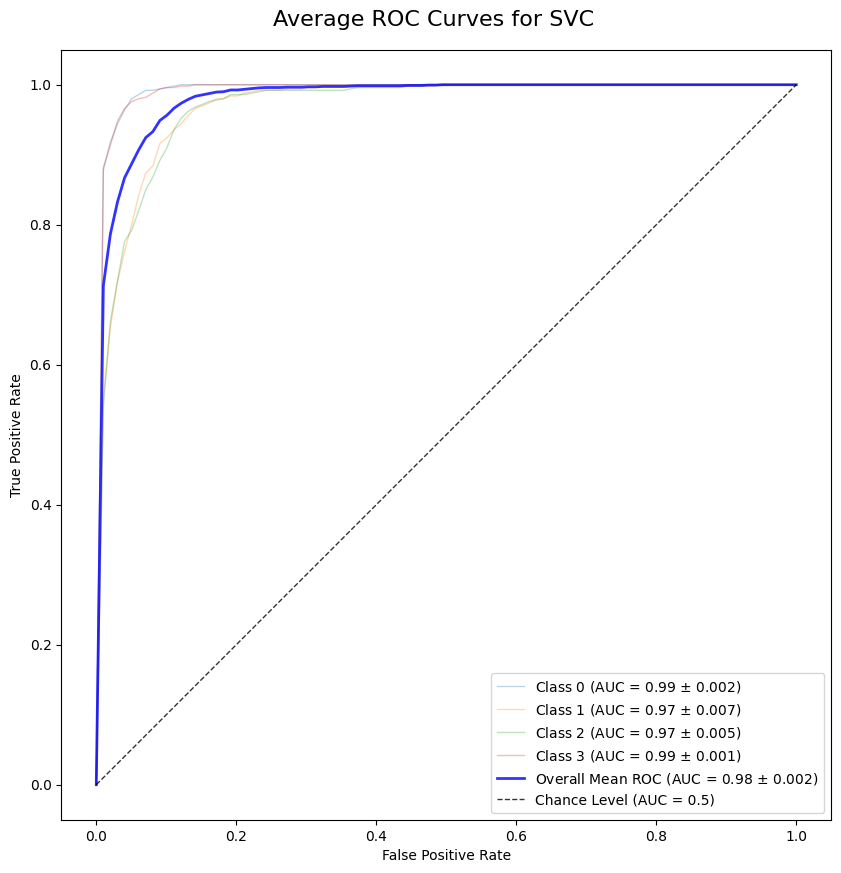

----- Naive_Bayes -----


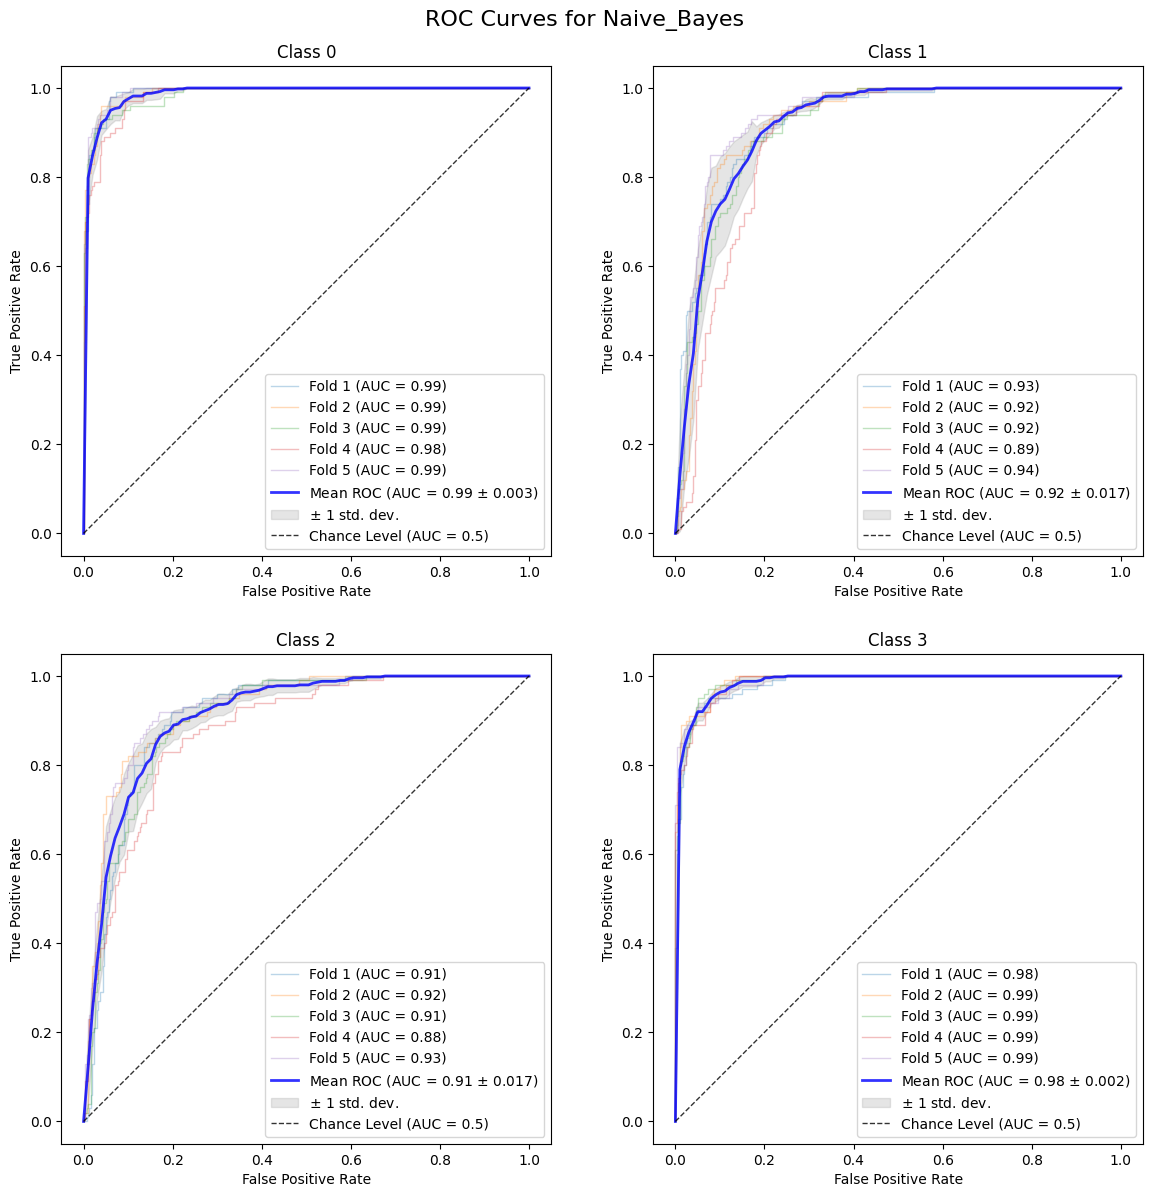

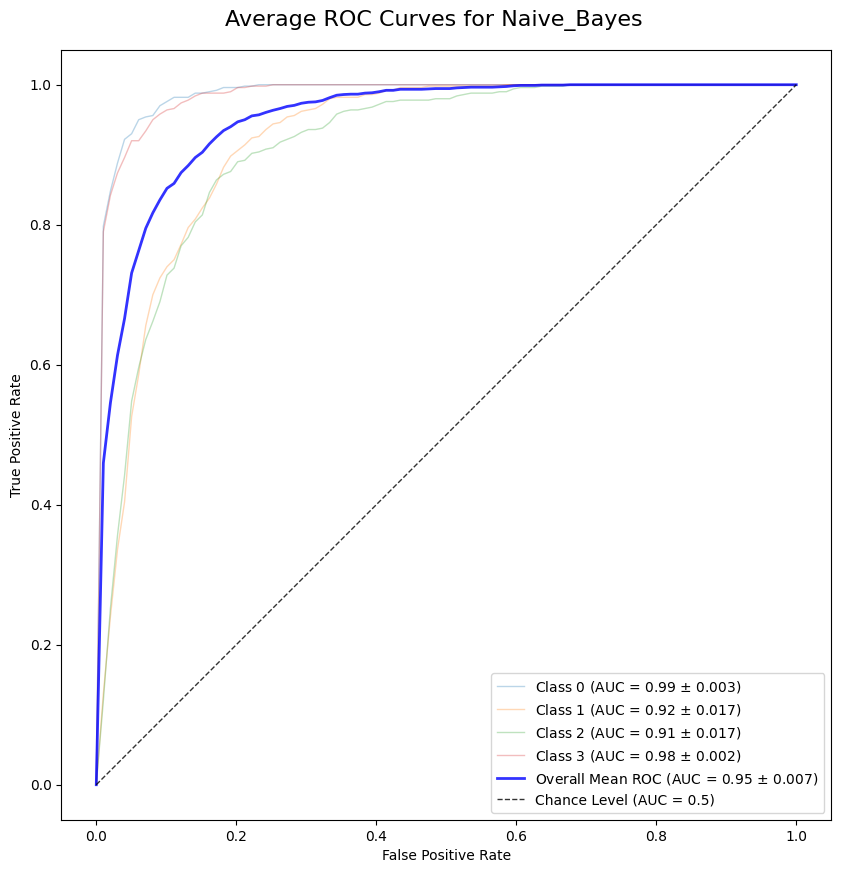

In [13]:
def plot_cv_roc(name, model):
    print(f'----- {name} -----')
    n_splits = 5
    classes = np.unique(y)
    n_classes = len(classes)
    cv = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    classifier = model

    fig, axes = plt.subplots(
        int(n_classes/2), int(n_classes/2), figsize=(14, 14))

    fig2, ax2 = plt.subplots(figsize=(10, 10))

    mean_fpr = np.linspace(0, 1, 100)
    all_mean_tprs = []
    all_std_aucs = []

    for i, class_label in enumerate(classes):

        tprs = []
        aucs = []

        for fold, (train, test) in enumerate(cv.split(X, y)):
            classifier.fit(X[train], y[train])
            y_proba = classifier.predict_proba(X[test])

            fpr, tpr, _ = roc_curve(y[test] == class_label, y_proba[:, i])

            ax = axes[int(i / 2)][i % 2]
            ax.plot(fpr,
                    tpr,
                    label=f'Fold {fold+1} (AUC = {auc(fpr, tpr):.2f})',
                    lw=1,
                    alpha=0.3,
                    )

            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(auc(fpr, tpr))

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        all_mean_tprs.append(mean_tpr)
        all_std_aucs.append(std_auc)

        ax.plot(
            mean_fpr,
            mean_tpr,
            color='blue',
            label=f'Mean ROC (AUC = {mean_auc:.2f} ' +
            r'$\pm$ ' + f'{std_auc:.3f})',
            lw=2,
            alpha=0.8,
        )

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

        ax.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )

        ax.plot(
            [0, 1],
            [0, 1],
            linestyle='--',
            lw=1,
            color='black',
            label='Chance Level (AUC = 0.5)',
            alpha=0.8
        )

        ax.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel='False Positive Rate',
            ylabel='True Positive Rate',
            title=f'Class {class_label}'
        )
        ax.axis('square')
        ax.legend(loc="lower right")

        ax2.plot(
            mean_fpr,
            mean_tpr,
            label=f'Class {class_label} (AUC = {mean_auc:.2f} ' +
            r'$\pm$ ' + f'{std_auc:.3f})',
            lw=1,
            alpha=0.3
        )

    overall_mean_tpr = np.mean(all_mean_tprs, axis=0)
    overall_mean_auc = auc(mean_fpr, overall_mean_tpr)
    overall_std_auc = np.std(all_std_aucs)

    ax2.plot(
        mean_fpr,
        overall_mean_tpr,
        color='blue',
        label=f'Overall Mean ROC (AUC = {overall_mean_auc:.2f} ' +
        r'$\pm$ ' + f'{overall_std_auc:.3f})',
        lw=2,
        alpha=0.8
    )

    ax2.plot(
        [0, 1],
        [0, 1],
        linestyle='--',
        lw=1,
        color='black',
        label='Chance Level (AUC = 0.5)',
        alpha=0.8
    )
    ax2.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel='False Positive Rate',
        ylabel='True Positive Rate',
    )
    ax2.axis('square')
    ax2.legend(loc='lower right')

    fig.suptitle(f'ROC Curves for {name}', y=0.92, fontsize=16)

    fig2.suptitle(f'Average ROC Curves for {name}', y=0.92, fontsize=16)

    plt.show()


for name, model in models.items():
    plot_cv_roc(name, model)

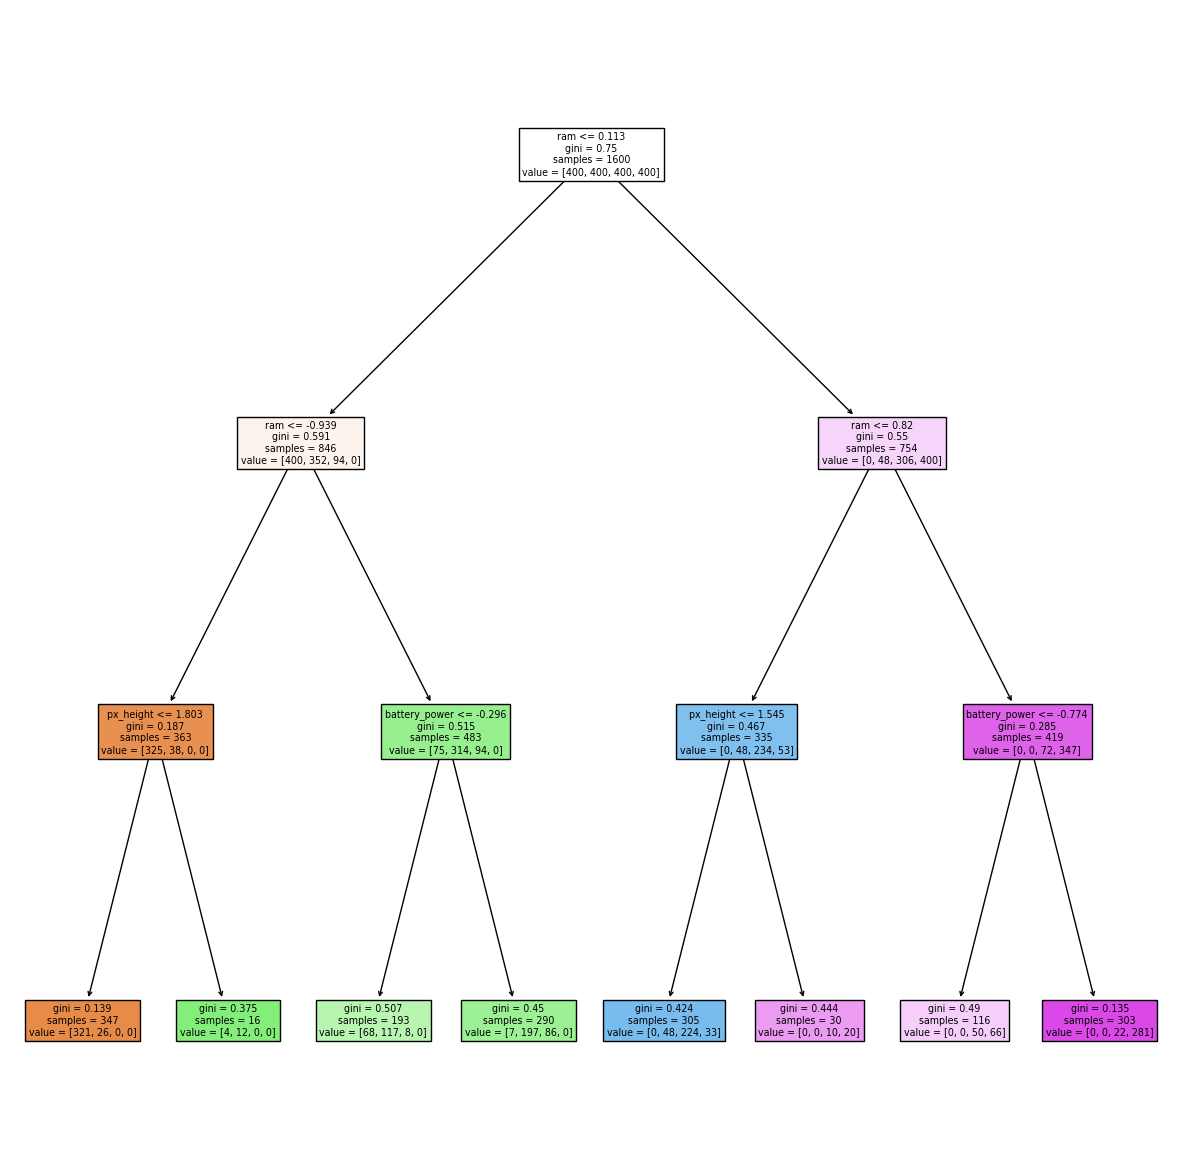

In [14]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=models['Decision_Tree'],
          feature_names=mobile_data.columns, filled=True)

plt.show()

Prueba con únicamente el atributo "RAM"


In [15]:
X = scaler.fit_transform(mobile_data.get(
    ['ram', 'battery_power', 'px_width', 'px_height']))
y = mobile_data['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scores = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    scores[name] = cross_val_score(model, X_train, y_train, scoring='accuracy')
    print(f'{name}: Average Accuracy={np.mean(scores[name]):.4f}')

KNN: Average Accuracy=0.8794
Decision_Tree: Average Accuracy=0.7706
Random_Forest: Average Accuracy=0.8981
SVC: Average Accuracy=0.9331
Naive_Bayes: Average Accuracy=0.7913


In [16]:
for name, model in models.items():
    report_print(name, model)

----- KNN -----
Average Accuracy: 0.8794
AUC (Cross-validated): 0.9864
Number of neighbors: 10
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       500
           1       0.87      0.88      0.88       500
           2       0.83      0.86      0.84       500
           3       0.95      0.86      0.90       500

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

----- Decision_Tree -----
Average Accuracy: 0.7706
AUC (Cross-validated): 0.9187
Maximum depth: 3
Number of nodes: 15
Number of leaf nodes: 8
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       500
           1       0.65      0.80      0.72       500
           2       0.67      0.60      0.63       500
           3       0.83      0.84      0.83       500

    accuracy                           0.76      2000
  

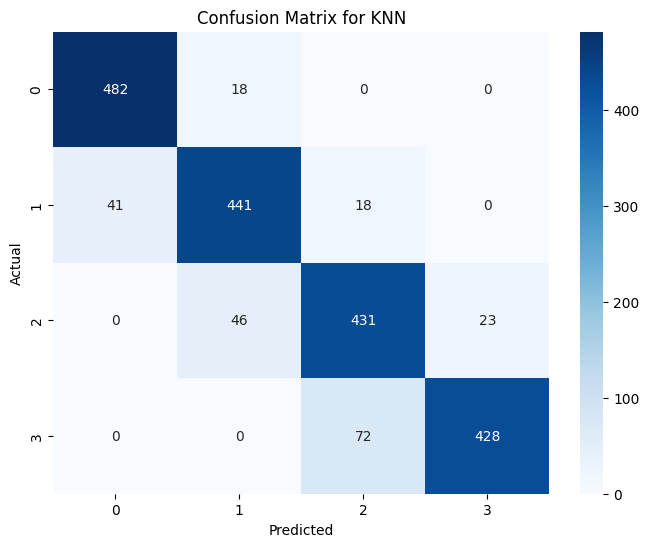

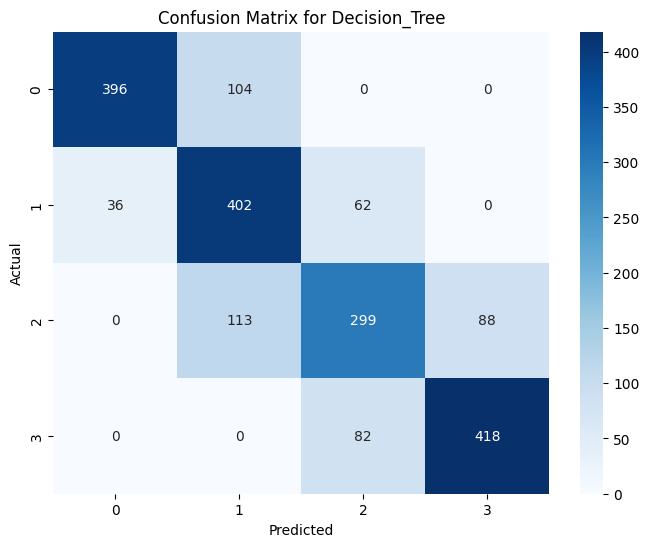

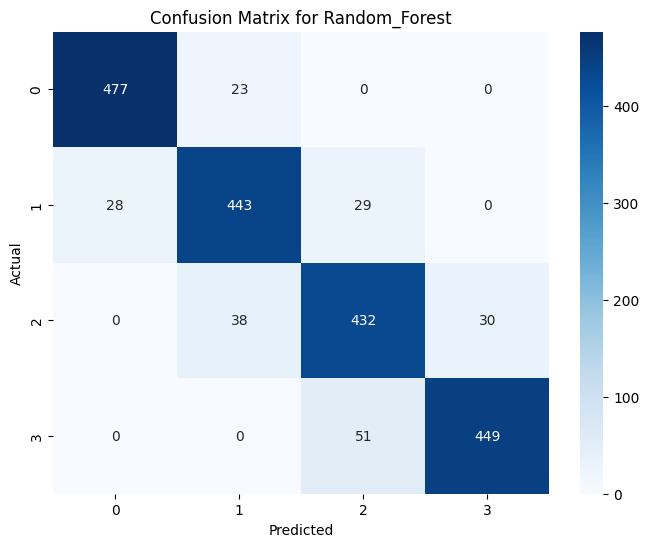

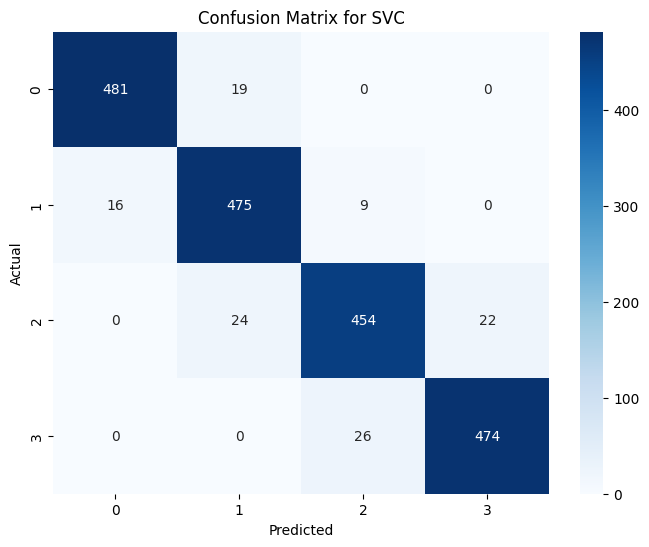

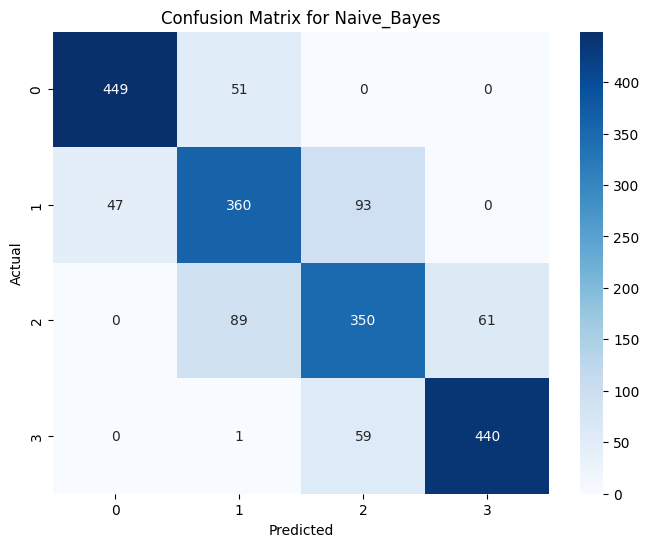

In [17]:
for name, model in models.items():
    confusion_matrix_plot(name, model)

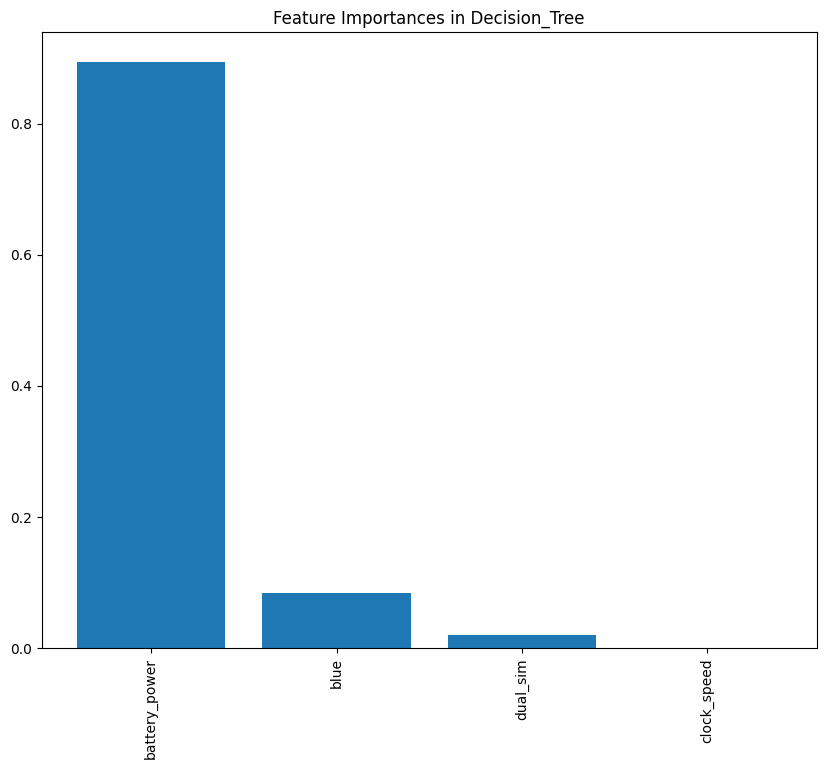

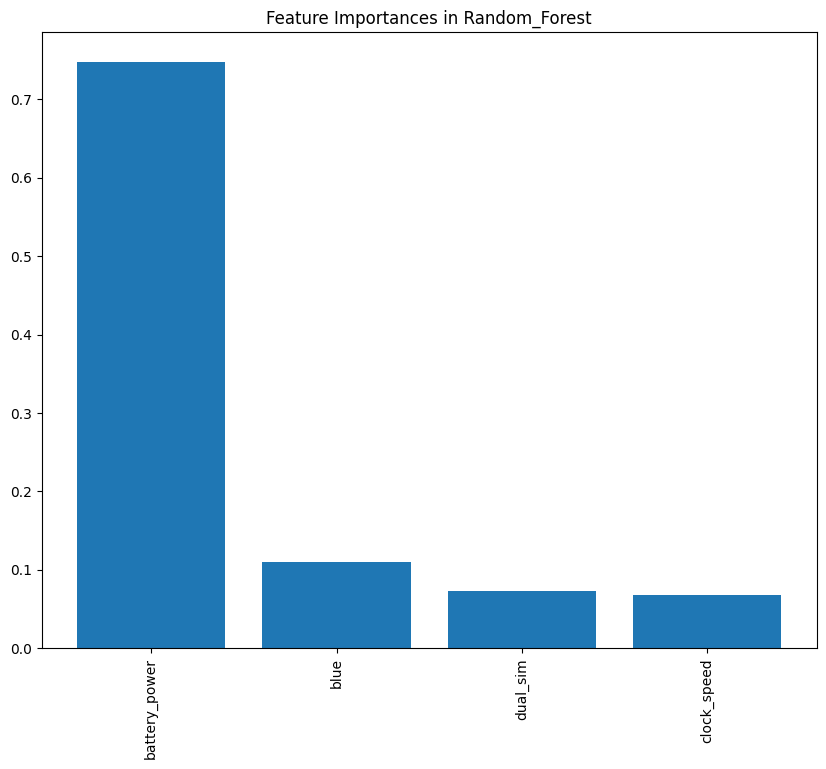

In [18]:
if 'Decision_Tree' in models:
    importances('Decision_Tree')

if 'Random_Forest' in models:
    importances('Random_Forest')

----- KNN -----


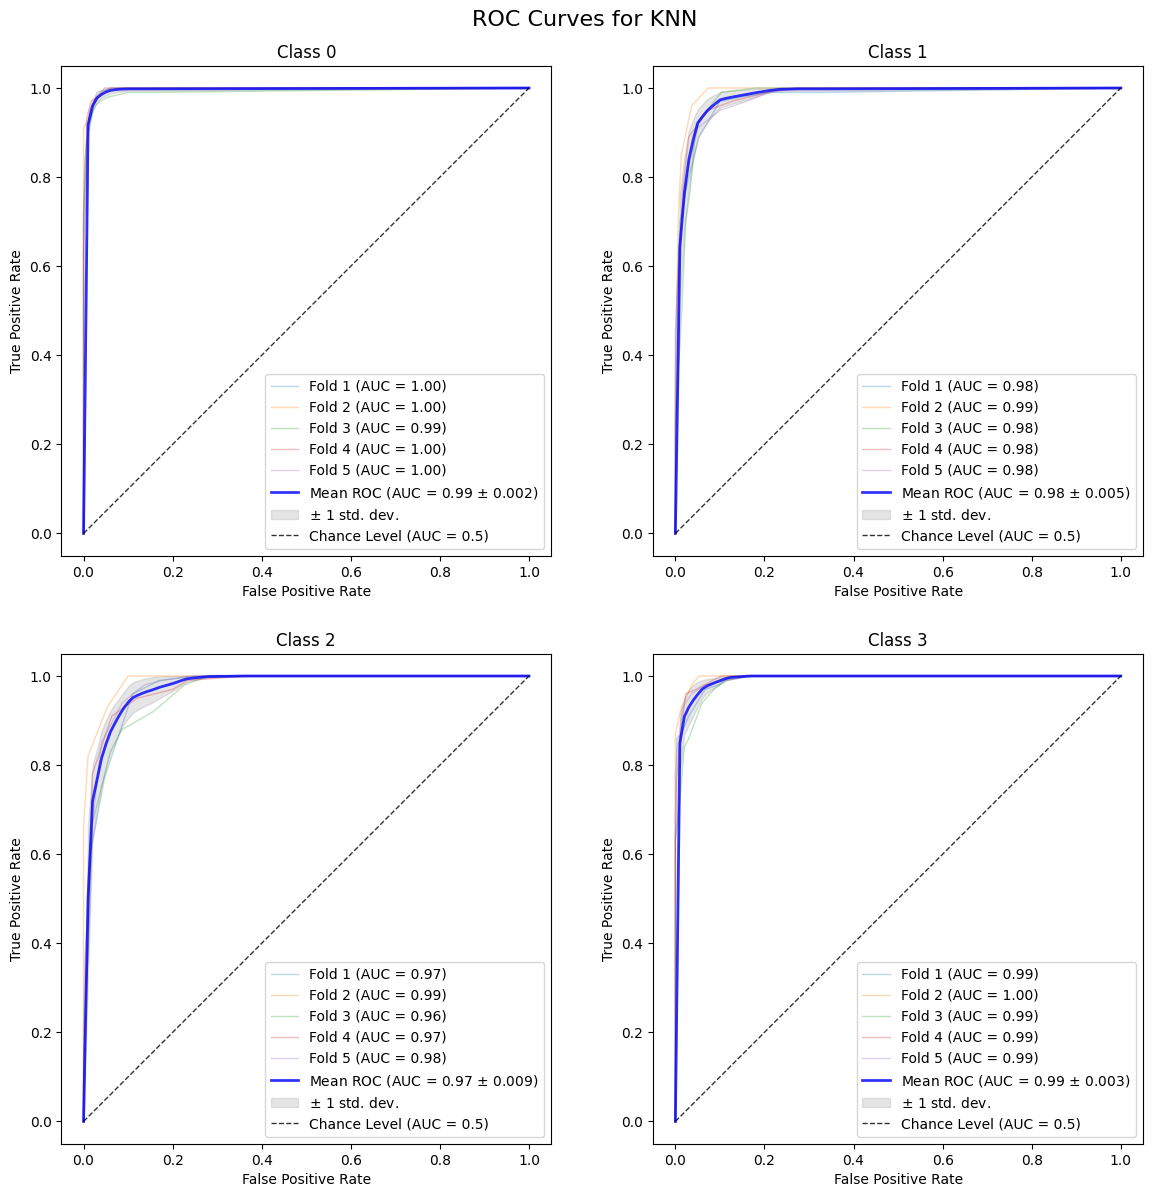

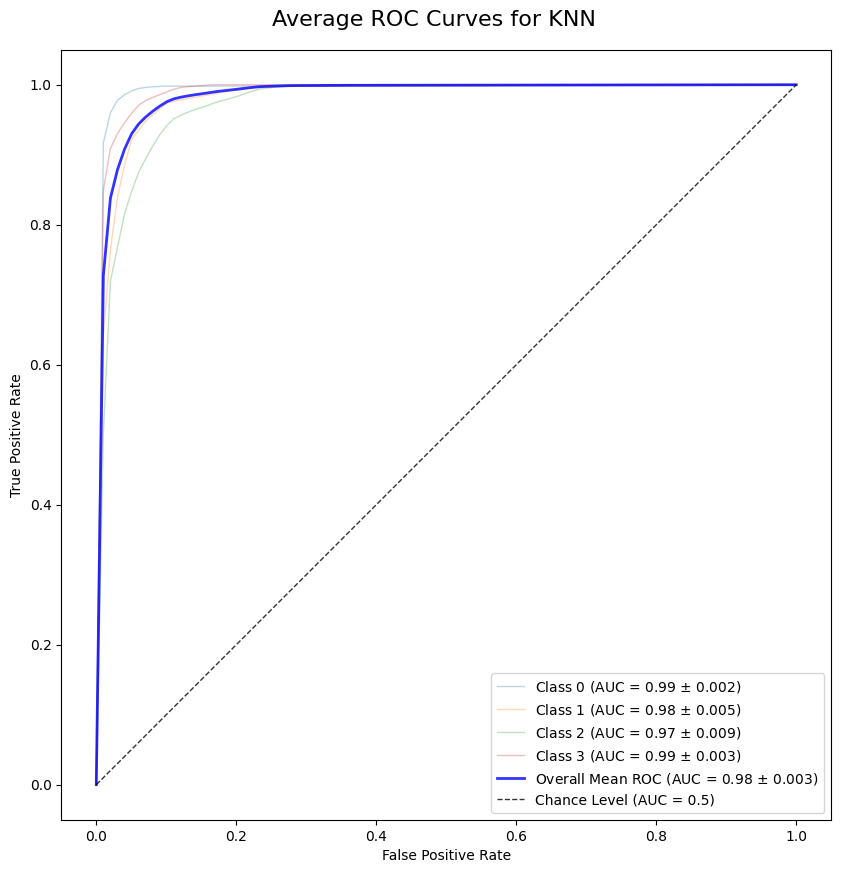

----- Decision_Tree -----


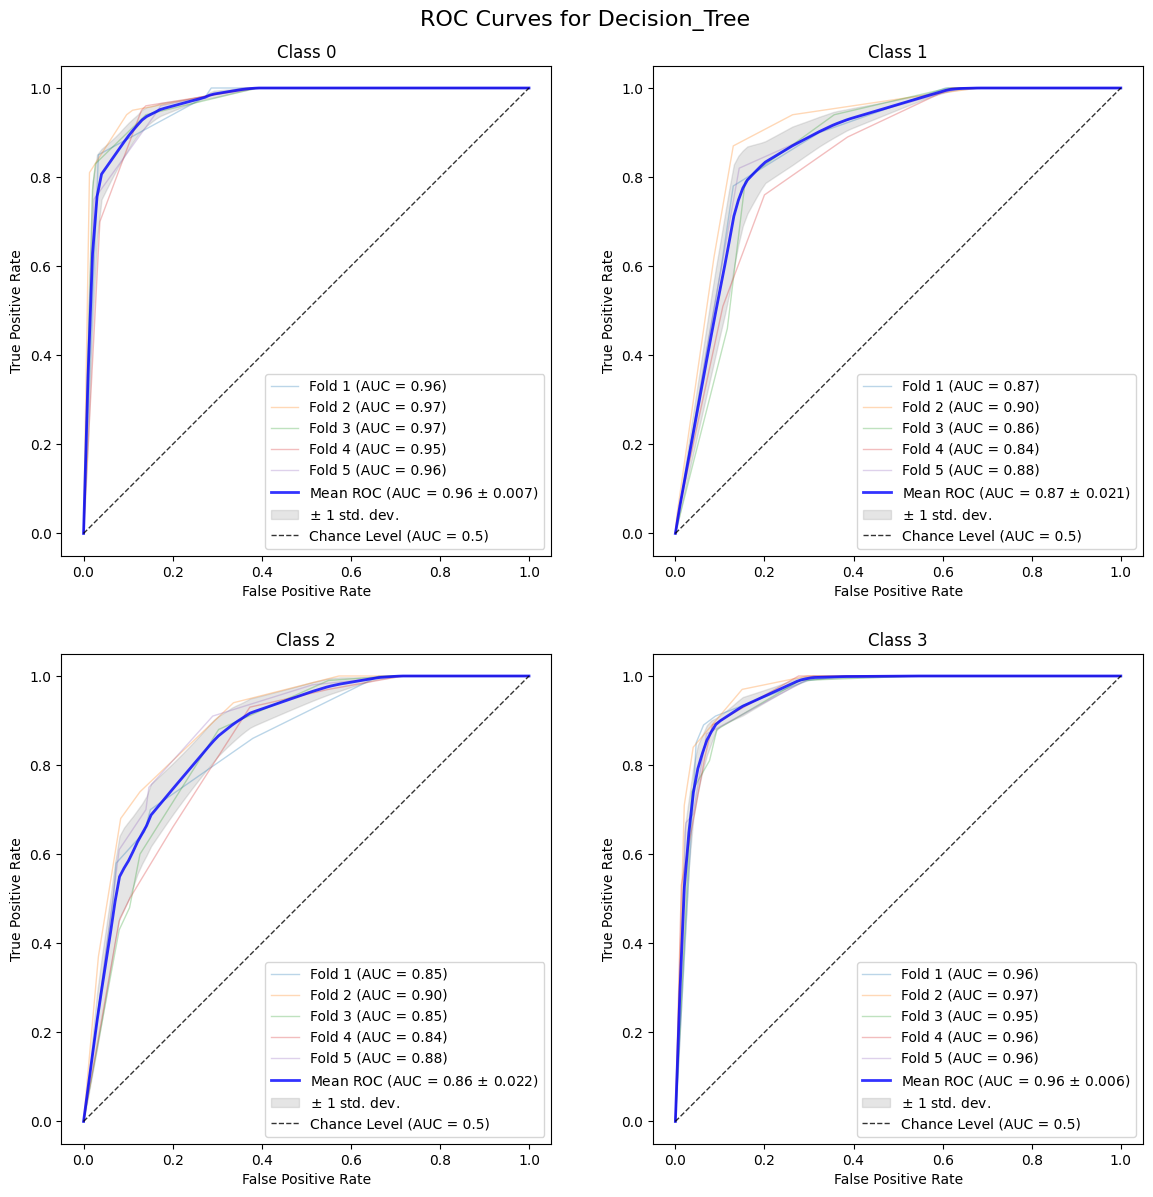

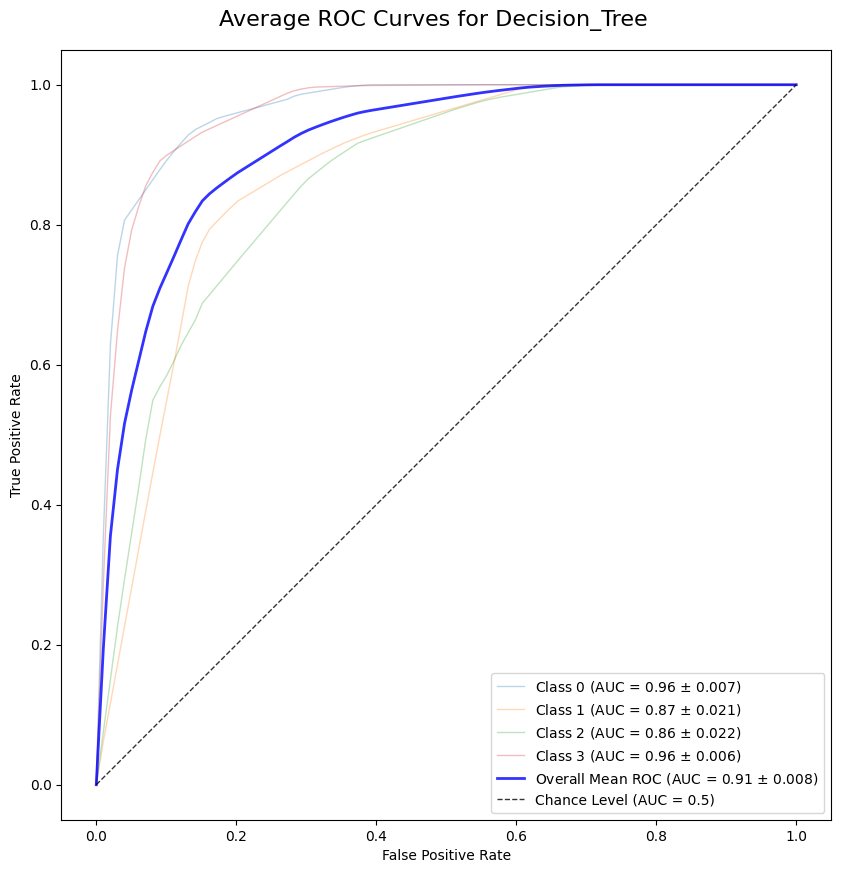

----- Random_Forest -----


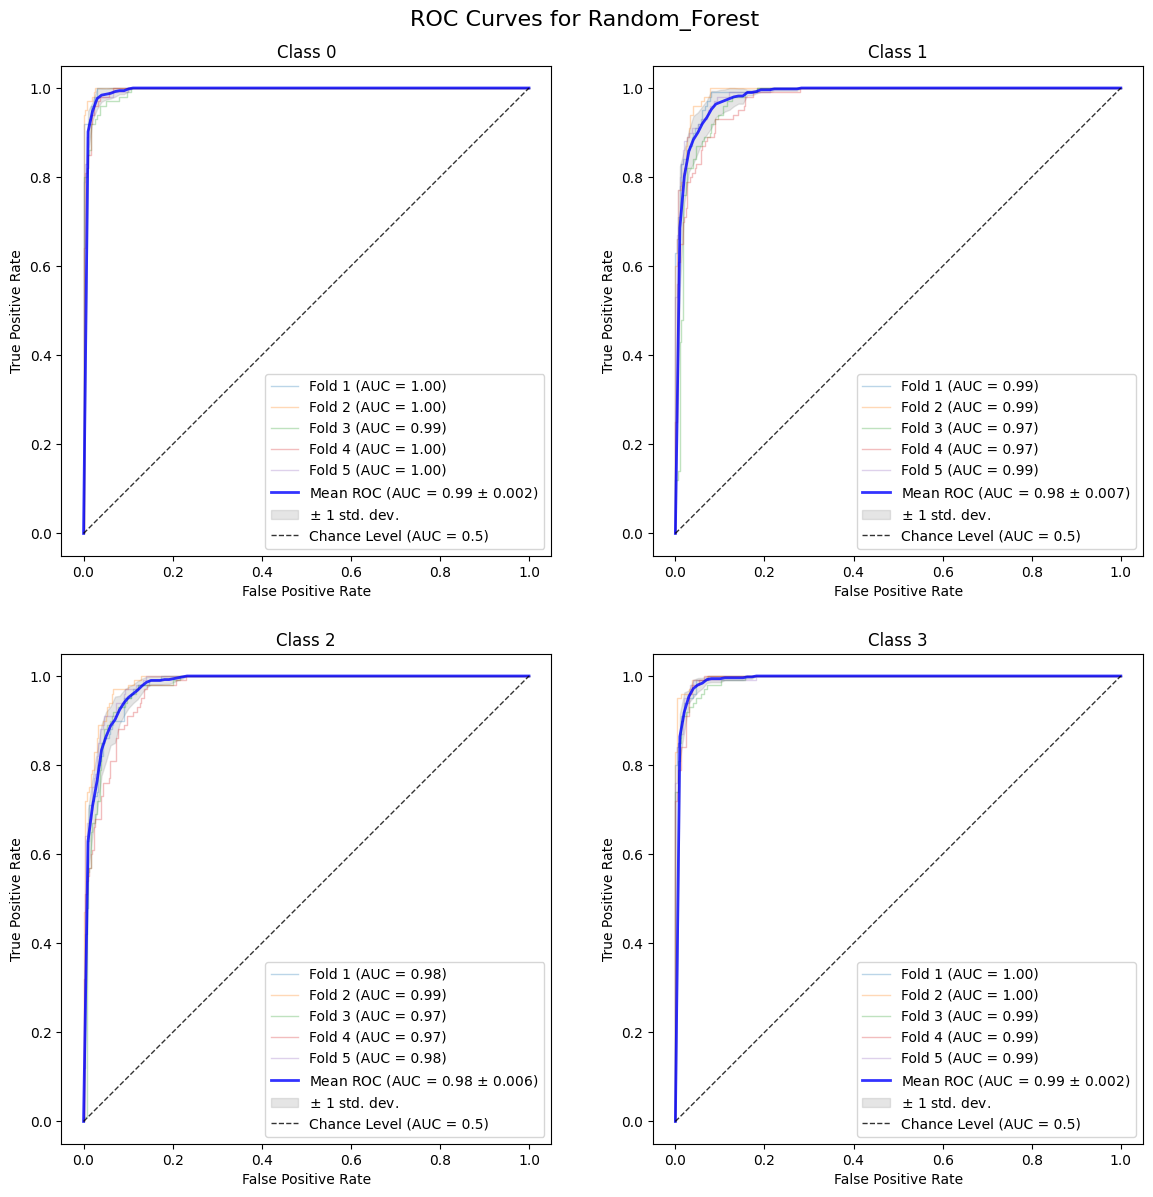

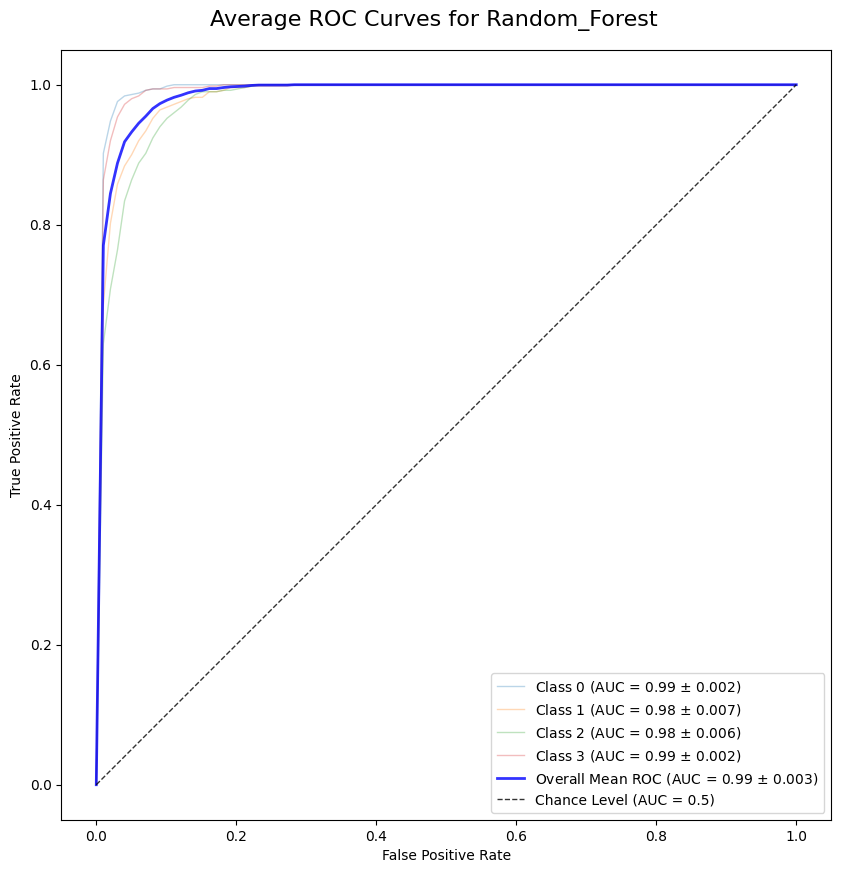

----- SVC -----


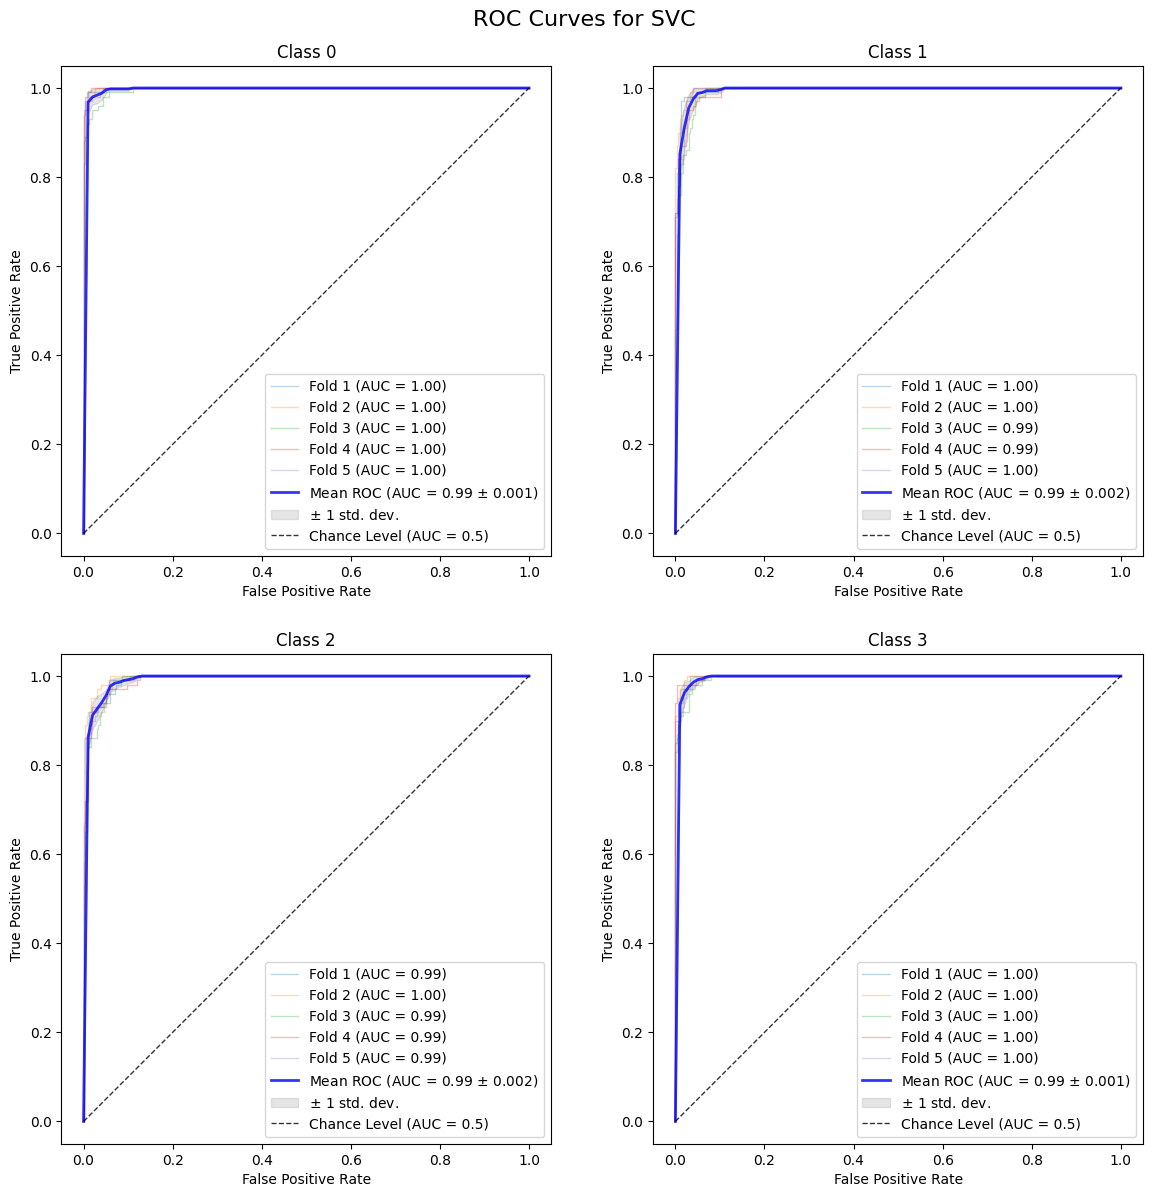

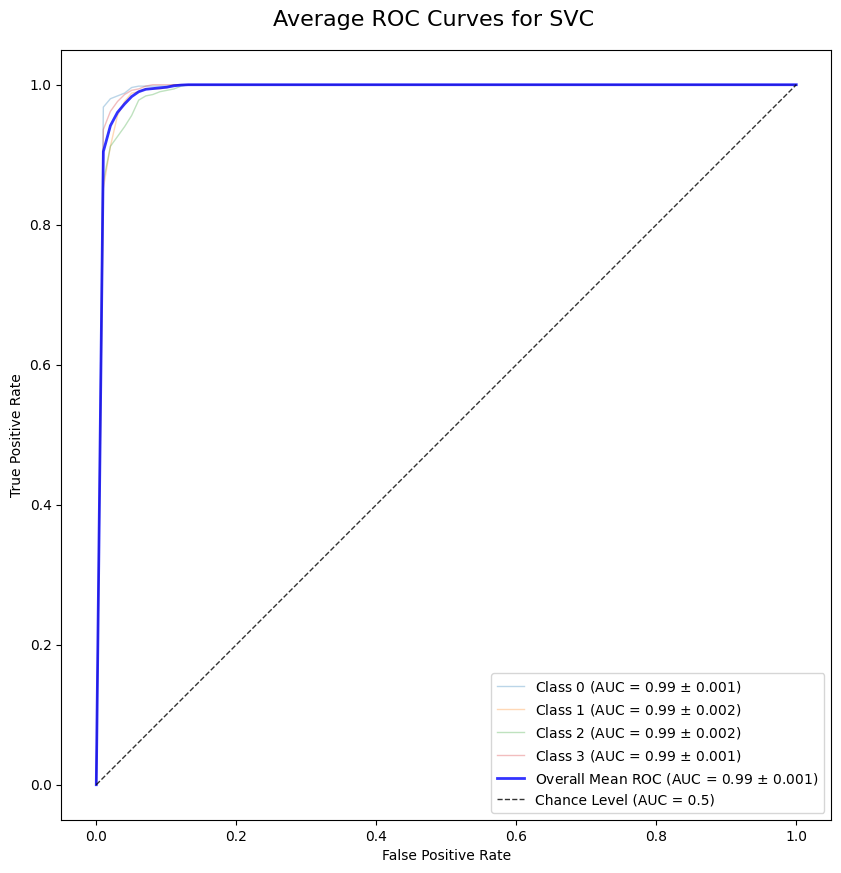

----- Naive_Bayes -----


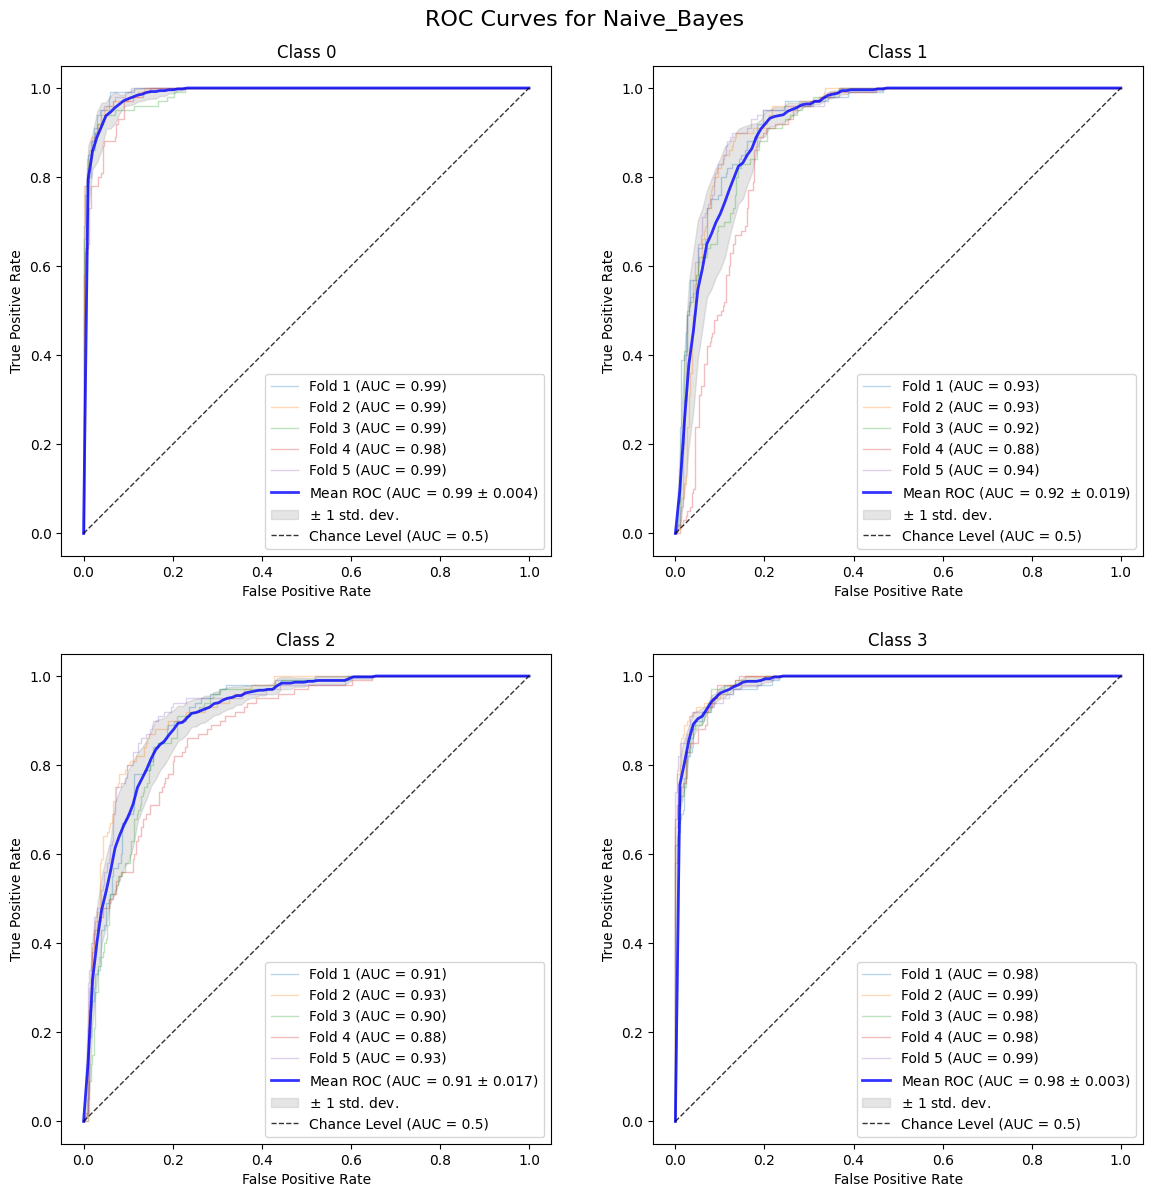

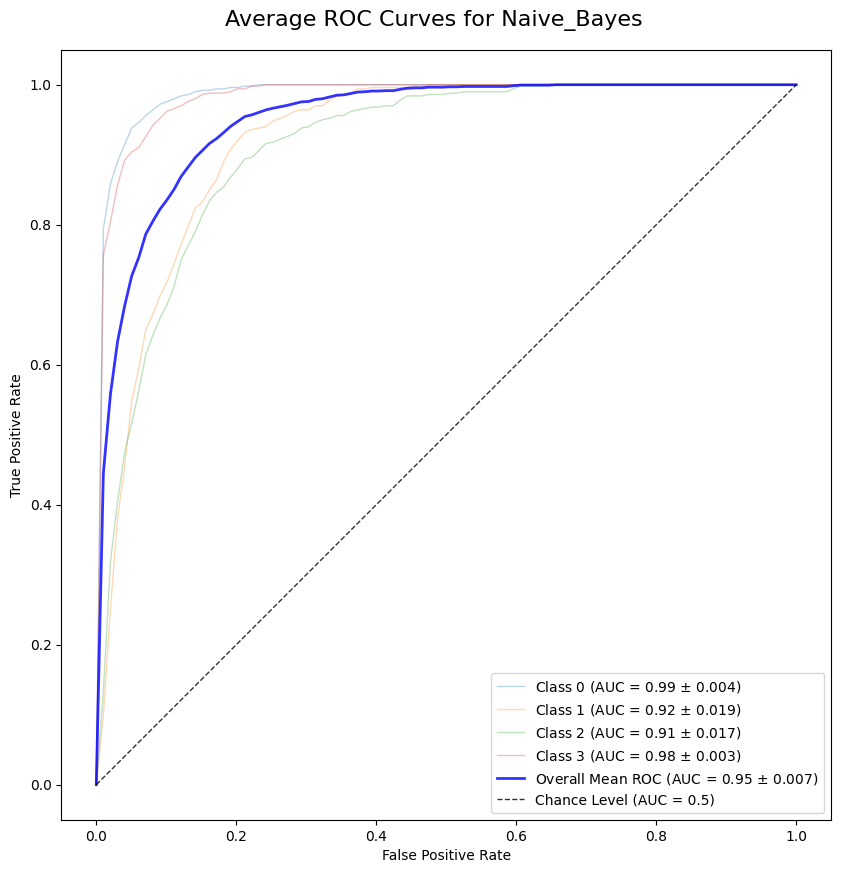

In [19]:
for name, model in models.items():
    plot_cv_roc(name, model)

[Text(0.5, 0.875, 'battery_power <= 0.113\ngini = 0.75\nsamples = 1600\nvalue = [400, 400, 400, 400]'),
 Text(0.25, 0.625, 'battery_power <= -0.939\ngini = 0.591\nsamples = 846\nvalue = [400, 352, 94, 0]'),
 Text(0.125, 0.375, 'dual_sim <= 1.803\ngini = 0.187\nsamples = 363\nvalue = [325, 38, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.139\nsamples = 347\nvalue = [321, 26, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [4, 12, 0, 0]'),
 Text(0.375, 0.375, 'blue <= -0.296\ngini = 0.515\nsamples = 483\nvalue = [75, 314, 94, 0]'),
 Text(0.3125, 0.125, 'gini = 0.507\nsamples = 193\nvalue = [68, 117, 8, 0]'),
 Text(0.4375, 0.125, 'gini = 0.45\nsamples = 290\nvalue = [7, 197, 86, 0]'),
 Text(0.75, 0.625, 'battery_power <= 0.82\ngini = 0.55\nsamples = 754\nvalue = [0, 48, 306, 400]'),
 Text(0.625, 0.375, 'dual_sim <= 1.545\ngini = 0.467\nsamples = 335\nvalue = [0, 48, 234, 53]'),
 Text(0.5625, 0.125, 'gini = 0.424\nsamples = 305\nvalue = [0, 48, 224, 33]'),
 Text(0.6875, 0.125

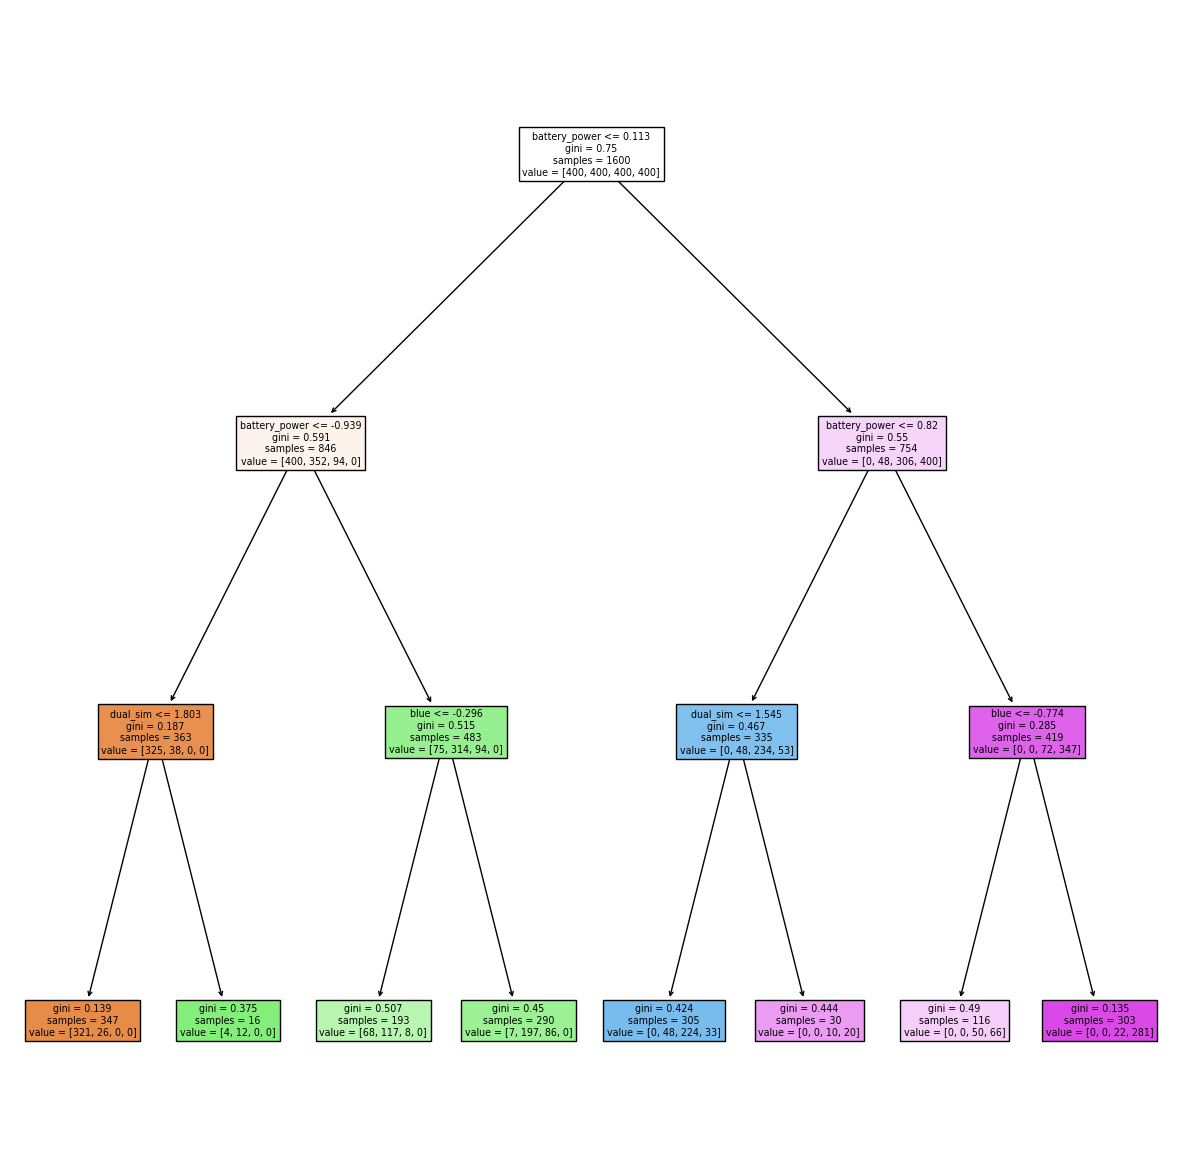

In [20]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=models['Decision_Tree'],
          feature_names=mobile_data.columns, filled=True)